In [14]:
# Imports and utility functions

from sympy import nsolve
from sympy.abc import x
from sympy.physics.units import hbar, nm, eV, electron_rest_mass, meter, kg, second
from sympy.physics.units import convert_to
from sympy import sin, cos, sqrt, sinh, cosh

from sympy.plotting import plot

from sympy.physics.units import Quantity

def unit(expr):
    try:
        return expr.as_coeff_Mul()[1]
    except:
        return 1
    
def remove_units(f, x, x_units, y_units):
    f_ = convert_to(f(x * x_units), [meter, kg, second])
    f_ = f_ / y_units
    f_ = convert_to(f_, [meter, kg, second])
    return f_

def plot_with_units(f, start, end, y_units):
    x_units = unit(start + end)
    f_ = remove_units(f, x, x_units, y_units)
    return plot(f_, (x, start/x_units, end/x_units), xlabel=str(x_units), ylabel=str(y_units), show=False)

def solve_with_units(f, x_estimate, y):
    x_units = unit(x_estimate)
    y_units = unit(y)
    f_ = remove_units(f, x, x_units, y_units)
    return nsolve(f_ - y/y_units, x_estimate/x_units)

In [2]:
# Problem specific constants

w = 0.2 * nm
z = 0.2 * nm
a = w + z
V = 2 * eV
m = electron_rest_mass

In [3]:
# Problem specific functions

def alpha(E):
    return sqrt(2 * m * (V - E))/hbar
    
def beta(E):
    return sqrt(2 * m * E)/hbar

def f(E):
    b_ = beta(E).simplify()
    a_ = alpha(E).simplify()
    return cos(b_ * w) * cosh(a_ * z) + 1/2 * (a_/b_ - b_/a_) * sin(b_ * w) * sinh(a_ * z)

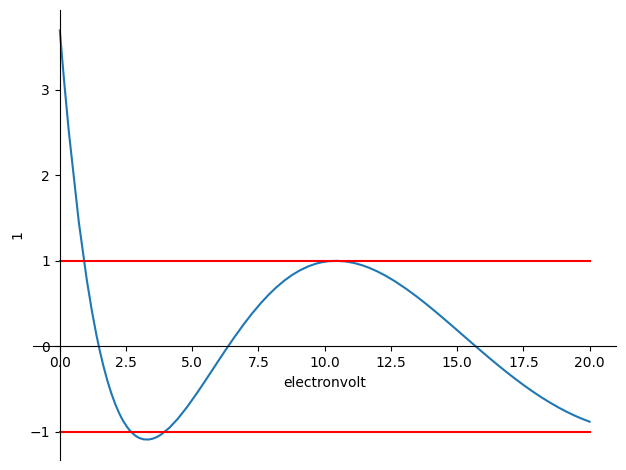

In [4]:
plt = plot_with_units(f, 0 * eV, 20 * eV, 1)
plt.append(plot(1, (x, 0, 20), line_color='red', show=False)[0])
plt.append(plot(-1, (x, 0, 20), line_color='red', show=False)[0])
plt.show()

In [15]:
b1_start = solve_with_units(f, 1 * eV, 1)
b1_end = solve_with_units(f, 2.5 * eV, -1)

b2_start = solve_with_units(f, 4 * eV, -1)
b2_end = solve_with_units(f, 10 * eV, 1)

b3_start = solve_with_units(f, 11 * eV, 1)
b3_end = solve_with_units(f, 20 * eV, -1)

In [6]:
from sympy.utilities.lambdify import lambdify

f_ = lambdify(x, remove_units(f, x, eV, 1),'numpy')


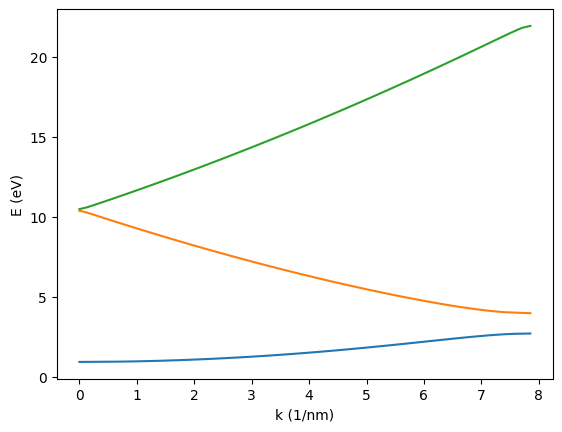

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def inverse_plot_band(b_start, b_end):
    x = np.linspace(b_start, b_end, 100) + 0j
    y = f_(x)
    
    a_ = float((a / nm).simplify())
    plt.plot(np.arccos(y) / a_, x)

plt.xlabel('k (1/nm)')
plt.ylabel('E (eV)')
inverse_plot_band(float(b1_start), float(b1_end))
inverse_plot_band(float(b2_start), float(b2_end))
inverse_plot_band(float(b3_start), float(b3_end))


In [57]:
from sympy import plot_implicit

In [60]:
from sympy import plot_implicit, symbols, Eq, And
y = symbols('y')

<string>:1: RuntimeWarning: divide by zero encountered in divide
<string>:1: RuntimeWarning: invalid value encountered in divide
<string>:1: RuntimeWarning: invalid value encountered in multiply


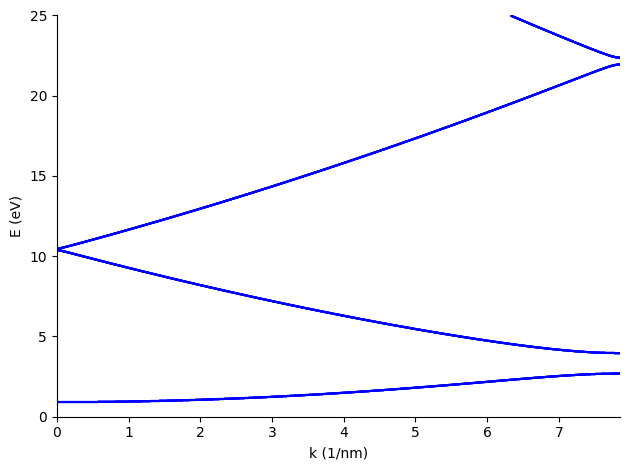

In [132]:
# another way of plotting the bands
f_ = remove_units(f, x, eV, 1)
k_ = remove_units(lambda y: cos(y * a), y, 1/nm, 1)
plot_implicit(Eq(f_, k_), (y, 0, np.pi/ 0.4), (x, 0, 25), adaptive=False, depth=2, points=2000, xlabel='k (1/nm)', ylabel='E (eV)')

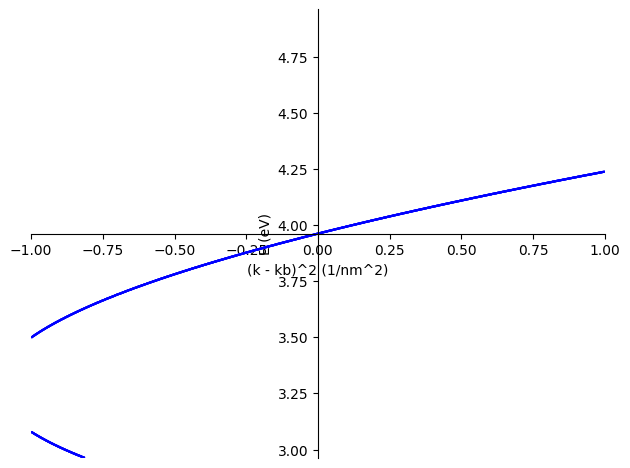

In [156]:
# graph E vs (k - kb)^2
f_ = remove_units(f, x, eV, 1)
k_ = remove_units(lambda y: cos((sqrt(y) + np.pi / a) * a), y, 1/nm**2, 1).simplify()
plot_implicit(Eq(f_, k_), (y, -1, 1), (x, b2_start-1, b2_start + 1), adaptive=False, depth=2, points=2000, xlabel='(k - kb)^2 (1/nm^2)', ylabel='E (eV)')

In [157]:
# implicit differentiation
from sympy.geometry.util import idiff
coeff = idiff(k_-f_, x, y).evalf(subs={x: b2_start, y: 0.000000000000001}) # eV nm^2
coeff = coeff * (nm**2 * eV) 

In [158]:
convert_to(((hbar**2/coeff)/2), m).evalf() 

0.118668760913341*electron_rest_mass